# Simulating Success

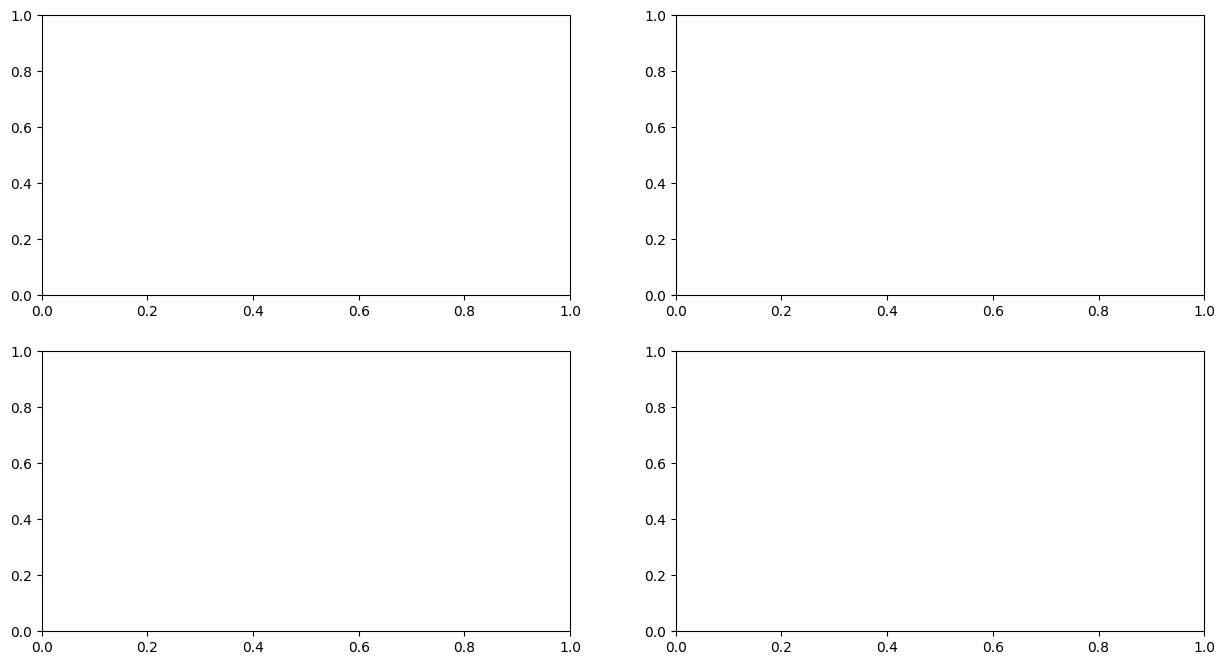

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
sys.path.append("..")

from scripts.success_sim.functions import *

I explore the fascinating topic of success, inspired by the work of physicist and network scientist Albert-László Barabási. Barabási is the author of the book “The Formula: The Universal Laws of Success”, where he reveals the simple equation that describes how successful a given endeavor is:

$S = Qr$

In this equation, $S$ is the success, $Q$ is the Q-factor of the creator, and $r$ is the quality of the underlying idea. The Q-factor is a measure of the ability of the creator to bring ideas to fruition in a given field, and it is influenced by factors such as talent, education, and experience. The quality of the idea, $r$, is a random variable that depends on the context, the audience, and the timing of the project. Barabási argues that success is not a direct result of our achievements, but an indirect reaction to how those achievements are perceived and valued by others.

Here I present the results of a simple computer simulation I developed to illustrate the implications of Barabási’s formula.

## Spoilers

In [2]:
anim = animation.FuncAnimation(fig, 
                               animate, 
                               frames=20, 
                               interval=1)
anim.save("./success.gif")
HTML(anim.to_jshtml(fps=10))

MovieWriter ffmpeg unavailable; using Pillow instead.


**1. Are unsuccessful people not talented? No.**

For less successful individuals, the distribution of talents is more or less much like the overall population of individuals. This means that just because one is not successful doesn’t mean one is not talented. Talented people can also be unsuccessful.

**2. There are two kinds of successful people: the talented and the untalented.**

For individuals who are relatively more successful, we start to see two kinds of talents shown by two peaks - those with low talent, and those with high talent. Just because one is successful doesn't mean one is talented.

**3. Talent is not the main driver of success**

Success doesn't change much with talent.

**4. Access to opportunities is the main driver of success**

What sets successful people apart from unsuccessful people is mostly opportunity.

**Main takeaway: If we want many to succeed, we need to open up more opportunities.**

## Set-up
Let's first define what $Q$ is. In this simple simulation, I defined $Q$ as the product of natural talent, $T$, and opportunity, $O$. We define natural talent, $T$, as the qualities ineherent to the individual, i.e. through genetics. This is fixed. Meanwhile opportunity, $O$, is heavily dependent on circumstances and chance. For example, one may be born predisposed to be as successful as Einstein, but was born in war-torn Syria, hence one is not able to make use of one's potential. We, thus can use $O$ as a measure of "luck." Now, the formula for $Q$ becomes:

$Q = TO$

For the sake of the simulation, we assume talent follows a standard normal distribution in the population. We note that IQ also follows a normal curve, so talent following a normal distribution is not far-fetched. We next assume that opportunity follows a power-law or pareto distribution. Note that wealth is distributed this way, so opportunity being distributed the same way is plausible.

Next, let's look at $r$, the quality of an idea. Not all ideas are good. Some ideas are good, while others are bad. The quality of ideas are dependent on the context, audience, and timing. Some ideas may be "ahead of its time," and thus don't flourish.

In this simulation, we assume that ideas are sampled from a standard normal distribution. The intuition in this assumption is the most common ideas are mediocre ones, while there are few really bad ideas, and few really good ideas.

Note, we picked the power law distribution parameters such that 20% of the samples cumulatively captures 80% of the total value, following the well-known 80-20 rule.

Let us now, take the example of $N=100,000$ individuals, where each individual has an attribute $(T, O)$, such that $T$ and $O$ are taken from the distributions defined above. Each individual also generates $M=100$ ideas, each with value $r$ taken from the distribution defined above.

We finally calculate the success, $S$ of each individual as the sum of all successes on all ideas, using the formula 

$S = TO\sum_{i=1}^M{r_i}$

## Distributions of Q, Talents, Opportunities, and Idea Quality

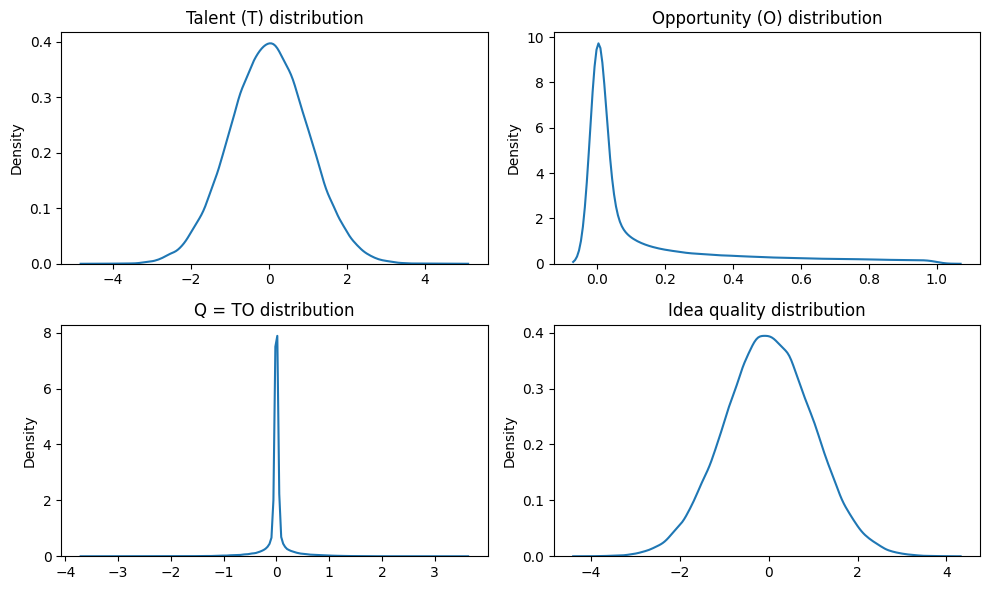

In [3]:
f, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

sns.kdeplot(T, ax=axs[0])
sns.kdeplot(O, ax=axs[1])
sns.kdeplot(Q, ax=axs[2])
sns.kdeplot(r, ax=axs[3])

axs[0].set_title("Talent (T) distribution")
axs[1].set_title("Opportunity (O) distribution")
axs[2].set_title("Q = TO distribution")
axs[3].set_title("Idea quality distribution")

plt.tight_layout()
plt.show()

## Distribution of $\sum{r_i}$

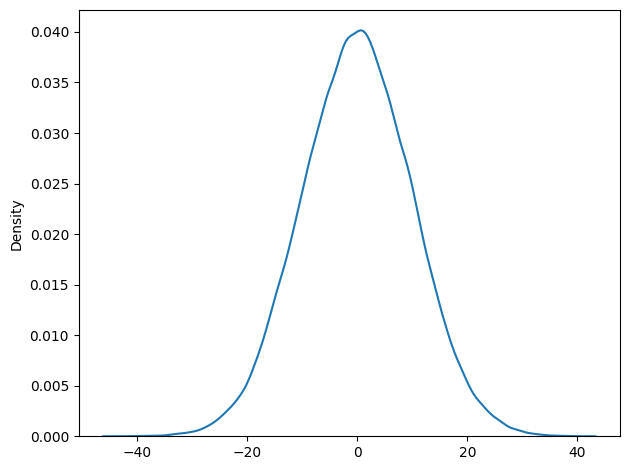

In [4]:
sns.kdeplot(sum_r)
plt.tight_layout()
plt.show()

## Distribution of $S = TO\sum_{i=1}^M{r_i}$
We observe that based on the distribution that most people would have ~0 success, or say mean success, while there are very few who are highly unsuccessful, and very few who are very successful.

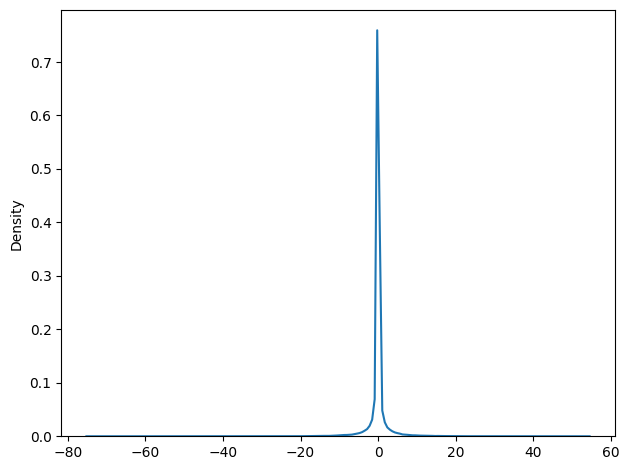

In [5]:
sns.kdeplot(S)
plt.tight_layout()
plt.show()

## Simulating How Talent, Opportunity, and Success Interact

In [6]:
anim = animation.FuncAnimation(fig, 
                               animate, 
                               frames=20, 
                               interval=1)
HTML(anim.to_jshtml(fps=10))

## Insights
We observe some interesting patterns!

**1. Are unsuccessful people not talented? No.**

For less successful individuals, the distribution of talents is more or less much like the overall population of individuals. This means that just because one is not successful doesn’t mean one is not talented. Talented people can also be unsuccessful.

**2. There are two kinds of successful people: the talented and the untalented.**

For individuals who are relatively more successful, we start to see two kinds of talents shown by two peaks - those with low talent, and those with high talent. Just because one is successful doesn't mean one is talented.

**3. Talent is not the main driver of success**

Success doesn't change much with talent.

**4. Access to opportunities is the main driver of success**

What sets successful people apart from unsuccessful people is mostly opportunity.

**Main takeaway: If we want many to succeed, we need to open up more opportunities.**